In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,  RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading a CSV titanic file
df= pd.read_csv(r"C:\Users\ammar\Downloads\Titanic-Dataset.csv")

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
#missing data handling
df.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
#Encoding
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
#check data Now
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [10]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


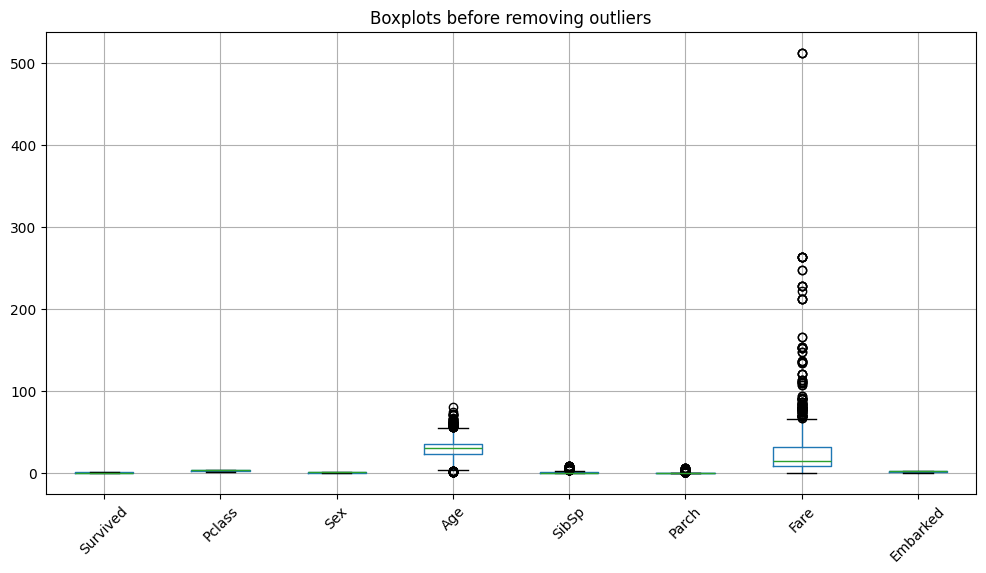

In [ ]:
#outlier detection (boxplot)
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplots before scaling outliers")
plt.xticks(rotation=45)
plt.show()

In [12]:
#outlier removing(Roubust Scaler)
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


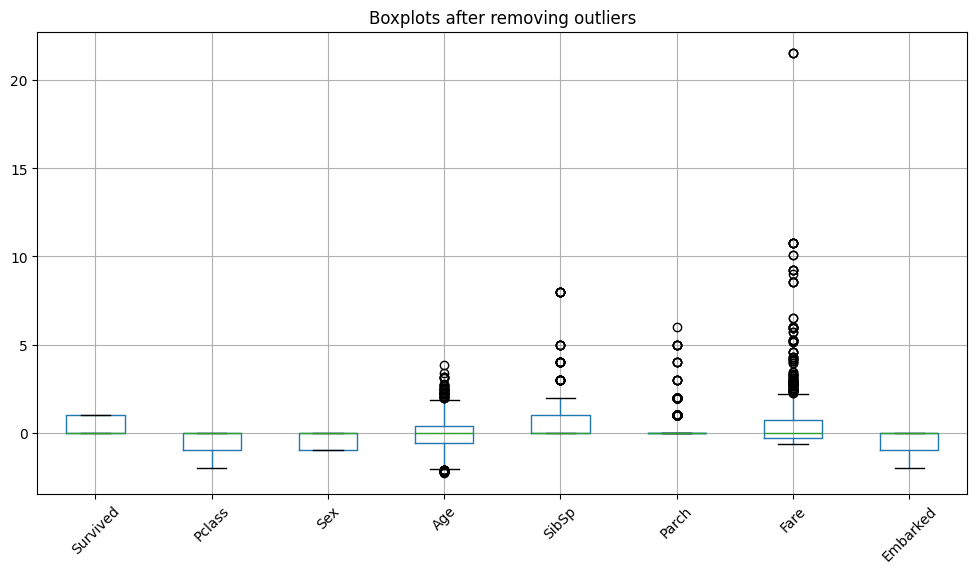

In [ ]:
#boxplot after removing outliers
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplots after scaling outliers")
plt.xticks(rotation=45)
plt.show()

In [14]:
#split& train data 
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# 1) KNN MODEL

In [16]:
# GridSearchCV 
param_grid = {'n_neighbors': list(range(1, 21)), 'metric': ['euclidean', 'manhattan',  'minkowski']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy',  )
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_d_method = grid_search.best_params_['metric']
print(f"best K is: {best_k} ,and best matrix d method {best_d_method}")


best K is: 13 ,and best matrix d method manhattan


In [17]:
#train& predict
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_d_method)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)


In [18]:
#accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(f"KNN Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", report_df.round(2))


KNN Accuracy: 81.01%

Classification Report:
               precision  recall  f1-score  support
0.0                0.82    0.87      0.84   105.00
1.0                0.79    0.73      0.76    74.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.81    0.80      0.80   179.00
weighted avg       0.81    0.81      0.81   179.00


In [19]:
# 2) LOGIStIC REGRESSION MODEL 

In [20]:
# Train& predict (logistic regression)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred2 = log_model.predict(X_test)

In [21]:
# Accuracy calculation
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", report_df.round(2))

Logistic Regression Accuracy: 81.01%

Classification Report:
               precision  recall  f1-score  support
0.0                0.83    0.86      0.84   105.00
1.0                0.79    0.74      0.76    74.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.81    0.80      0.80   179.00
weighted avg       0.81    0.81      0.81   179.00
